In [1]:
#https://stackoverflow.com/questions/78919675/how-to-plot-bar-graph-with-button-for-multiple-categories

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq
import re
import datetime
import os
import time

import plotly.offline as pyo 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-081114.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-084343.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-084944.xlsx'

In [3]:
xls = pd.ExcelFile(stock_excel_filepath)

In [4]:
df_basic_info               = pd.read_excel(xls, "Basic Info") # Top Ratios
df_top_ratios               = pd.read_excel(xls, "Top Ratios") # Top Ratios
df_quaterly_results         = pd.read_excel(xls, "Quarterly Results") # Quarterly Results
df_profit_n_loss            = pd.read_excel(xls, "Profit & Loss") # Profit & Loss
df_compounded_sales_growth  = pd.read_excel(xls, "Compounded Sales Growth") # Compounded Sales Growth
df_compounded_profit_growth = pd.read_excel(xls, "Compounded Profit Growth") # Compounded Profit Growth
df_stock_price_cagr         = pd.read_excel(xls, "Stock Price CAGR") # Stock Price CAGR
df_return_on_equity         = pd.read_excel(xls, "Return on Equity") # Return on Equity
df_balance_sheet            = pd.read_excel(xls, "Balance Sheet") # Balance Sheet
df_cash_flows               = pd.read_excel(xls, "Cash Flows") # Cash Flows
df_ratios                   = pd.read_excel(xls, "Ratios") # Ratios
df_shareholding_pattern     = pd.read_excel(xls, "Shareholding Pattern") # Shareholding Pattern

In [5]:
df_top_ratios

,Stockname,Market Cap in Cores Rupees,Current Price in Rupees,High in Rupees,Low in Rupees,Stock PE,Book Value in Rupees,Dividend Yield %,ROCE %,ROE %,Face Value in Rupees
0,HDFCBANK,1254384,1645,1794,1363.0,19.30,580.0,1.19,7.54,16.90,1
1,ICICIBANK,870575,1236,1258,899.0,20.60,339.0,0.81,7.51,18.60,2
2,KOTAKBANK,353478,1778,1926,1544.0,25.40,487.0,0.11,7.24,15.30,5
3,AXISBANK,365055,1181,1340,951.0,14.50,489.0,0.08,6.92,18.00,2
4,INDUSINDBK,110833,1423,1694,1329.0,12.30,807.0,1.16,7.93,15.20,10
5,SBIN,730703,819,912,543.0,11.00,423.0,1.67,6.05,17.30,1
6,BANKBARODA,126104,244,300,188.0,6.94,217.0,3.12,6.32,16.90,2
7,PNB,124865,113,143,66.2,12.20,96.7,1.32,5.41,7.99,2


In [55]:
df = df_quaterly_results

df.drop(df[df['Quarterly Results'] == 'Raw PDF'].index, inplace=True)



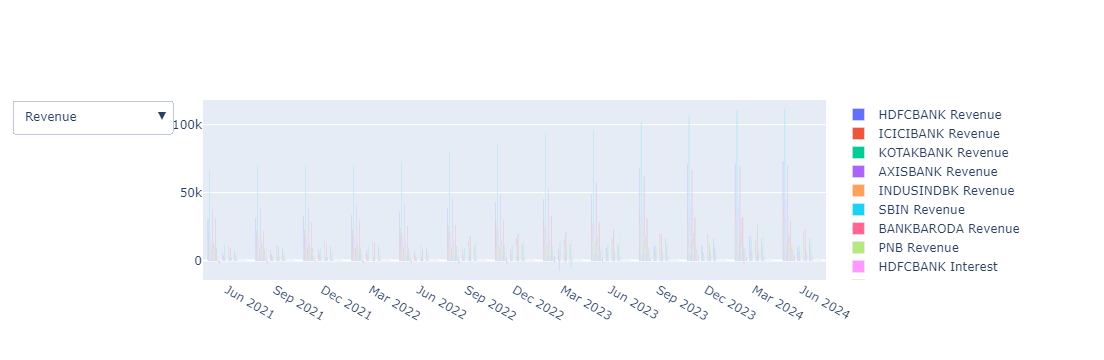

'MultiCategoryPlot.html'

In [56]:


fig = go.Figure()


# List of quarters
x = df.columns[2:]

# Add traces for each metric
for result in df['Quarterly Results'].unique():
    for stock in df['Stockname'].unique():
        fig.add_trace(go.Bar(
            x=x,
            y=df[(df['Stockname'] == stock) & (df['Quarterly Results'] == result)].iloc[0, 2:],
            name=f'{stock} {result}'
        ))

# Add buttons to toggle the visibility
buttons = [{'label': label, 'method': 'update',
            'args': [{'visible': [label in trace.name for trace in fig.data]}]}
           for label in df['Quarterly Results'].unique()]

updatemenus = [{'buttons': buttons,
                'direction': "down",
                'showactive': True, }]

# update layout with buttons, and show the figure
fig.update_layout(updatemenus=updatemenus)
fig.show()

pyo.plot(fig, filename='MultiCategoryPlot.html')